In [105]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import necessary libraries and read csv, check datatypes, drop unnecessary columns

In [106]:
pl=pd.read_csv('Premier_League.csv')

In [107]:
pl.head()

,date,clock,stadium,attendance,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,...,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,links
0,28th May 2023,4:30pm,Emirates Stadium,"60,095",Arsenal,5,Wolverhampton Wanderers,0,51.0,49.0,...,52.2,0,3,8,11,0,0,0,0,https://www.skysports.com/football/arsenal-vs-...
1,28th May 2023,4:30pm,Villa Park,"42,212",Aston Villa,2,Brighton and Hove Albion,1,40.3,59.7,...,47.8,3,3,15,16,4,4,0,0,https://www.skysports.com/football/aston-villa...
2,28th May 2023,4:30pm,Gtech Community Stadium,"17,120",Brentford,1,Manchester City,0,34.4,65.6,...,50.0,2,3,12,8,4,0,0,0,https://www.skysports.com/football/brentford-v...
3,28th May 2023,4:30pm,Stamford Bridge,"40,130",Chelsea,1,Newcastle United,1,64.4,35.6,...,45.5,3,5,9,11,0,0,0,0,https://www.skysports.com/football/chelsea-vs-...
4,28th May 2023,4:30pm,Selhurst Park,"25,198",Crystal Palace,1,Nottingham Forest,1,66.0,34.0,...,41.7,3,2,9,13,0,2,0,0,https://www.skysports.com/football/crystal-pal...


In [108]:
pl.drop(['links'],axis=1,inplace=True)
pl['attendance']=pd.to_numeric(pl['attendance'].str.replace(',',''),errors='coerce')
pl['attendance']=pl['attendance'].dropna().astype(int)

In [109]:
pl.dtypes

date                 object
clock                object
stadium              object
attendance          float64
Home Team            object
Goals Home            int64
Away Team            object
Away Goals            int64
home_possessions    float64
away_possessions    float64
home_shots            int64
away_shots            int64
home_on               int64
away_on               int64
home_off              int64
away_off              int64
home_blocked          int64
away_blocked          int64
home_pass           float64
away_pass           float64
home_chances          int64
away_chances          int64
home_corners          int64
away_corners          int64
home_offside          int64
away_offside          int64
home_tackles        float64
away_tackles        float64
home_duels          float64
away_duels          float64
home_saves            int64
away_saves            int64
home_fouls            int64
away_fouls            int64
home_yellow           int64
away_yellow         

Compare average home and away possessions of each team, sort the values with average home possessions.

In [110]:
avg_hp=pl.groupby('Home Team')['home_possessions'].agg([np.mean])
avg_hp.rename(columns={'Home Team':'Team', 'mean':'Average Home Possessions'},inplace=True)

avg_ap=pl.groupby('Away Team')['away_possessions'].agg([np.mean])
avg_ap.rename(columns={'Away Team':'Team', 'mean':'Average Away Possessions'},inplace=True)

avg_home_away_possessions=pd.concat([avg_hp,avg_ap],axis=1)
avg_home_away_possessions

,Average Home Possessions,Average Away Possessions
Arsenal,62.378947,57.094737
Aston Villa,49.984211,48.847368
Bournemouth,40.905263,39.331579
Brentford,43.647368,43.268421
Brighton and Hove Albion,60.210526,60.684211
Chelsea,59.257895,58.852632
Crystal Palace,46.921053,45.473684
Everton,43.757895,41.410526
Fulham,50.736842,46.442105
Leeds United,47.757895,46.252632


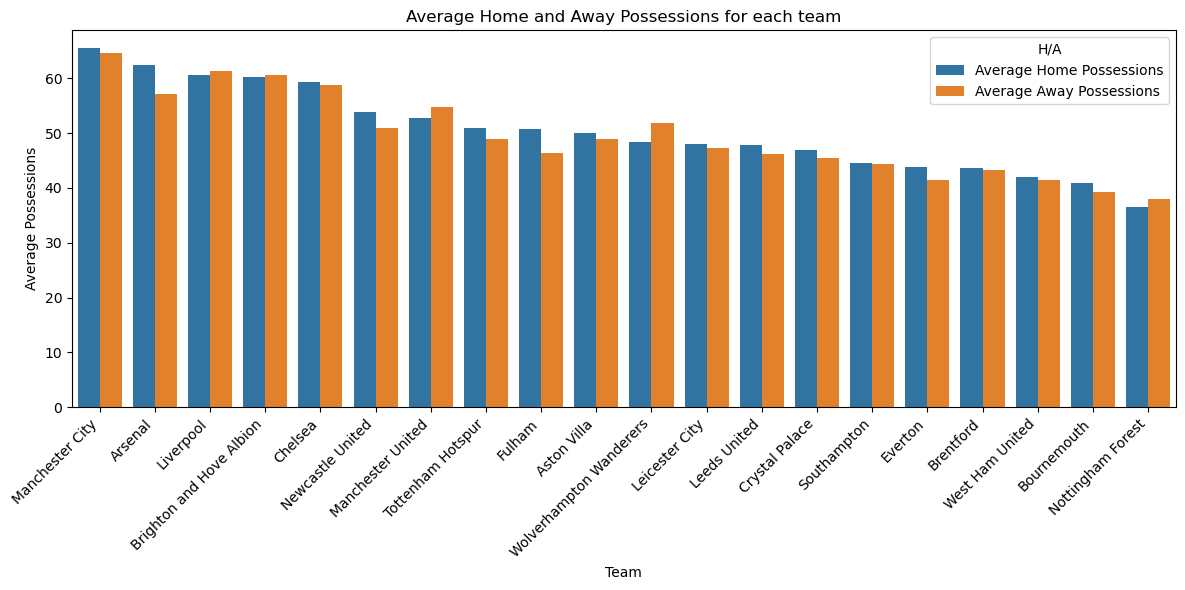

In [111]:
avg_home_away_possessions.reset_index(inplace=True)
avg_home_away_possessions.sort_values(by=['Average Home Possessions'],ascending=False,inplace=True)

avg_home_away_possessions=pd.melt(avg_home_away_possessions,id_vars='index',var_name='H/A',value_name='Average Possessions')
plt.figure(figsize=(12,6))
sns.barplot(x='index',y='Average Possessions',hue='H/A',data=avg_home_away_possessions)
plt.xticks(rotation=45,ha='right')
plt.xlabel('Team')
plt.title('Average Home and Away Possessions for each team')
plt.tight_layout()
plt.show()

Analysis: we can see that most of the team have more home possessions than away possessions. Out of 20 teams, only Liverpool, Brighton, Man Utd, Wolves,Nottingham Forest. Wolves do significantly better possession game when played at away than home while Arsenal do it better at their home. The other teams have not much difference in average possessions at home and away. Manchester City is the highest in both home possessions and away possessions and they are Champions of this season. Arsenal, 1st runnerup has second highest average home possessions. We can see that possession game is really important since 4 out of top 6 teams are leading in average possessions with the exception of Arsenal with low avearge away possessions and Manchester United and New Castle United despite their top 3 and 4 finish, trailing behind other top 6 teams in possession game.

In [117]:
avg_attendance=pl.groupby(['stadium','Home Team'])['attendance'].agg([np.mean])
avg_attendance=avg_attendance.dropna()
avg_attendance.sort_values(by=['mean'],ascending=False)

,,mean
stadium,Home Team,
Old Trafford,Manchester United,73644.555556
London Stadium,West Ham United,62462.315789
Tottenham Hotspur Stadium,Tottenham Hotspur,61585.157895
Emirates Stadium,Arsenal,60186.052632
Etihad Stadium,Manchester City,53249.052632
Anfield,Liverpool,53178.611111
"St James' Park, Newcastle",Newcastle United,52127.473684
Villa Park,Aston Villa,41706.894737
Stamford Bridge,Chelsea,40002.052632


Stadium of Manchester United, West Ham and Tottenham are leading in average attendance. Old Trafford is significantly leading in average attendance compared to other teams.